In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
df = pd.read_csv('/Users/mac/Desktop/projects/zoomcamp ml/Lesson_2/laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [268]:
df.columns
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [269]:
df = df[['ram', 'storage', 'screen', 'final_price']]
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


<Axes: xlabel='final_price', ylabel='Count'>

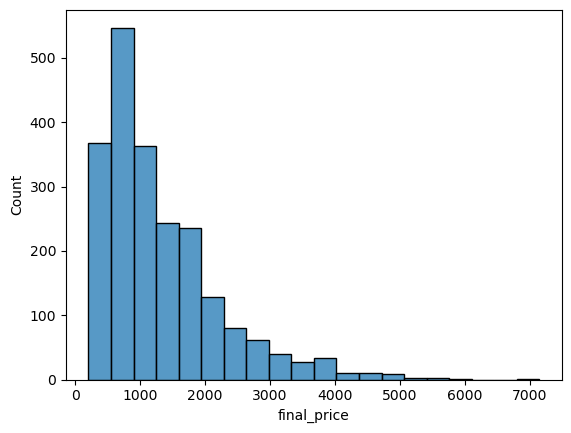

In [270]:
sns.histplot(df.final_price, bins=20)


<Axes: xlabel='final_price', ylabel='Count'>

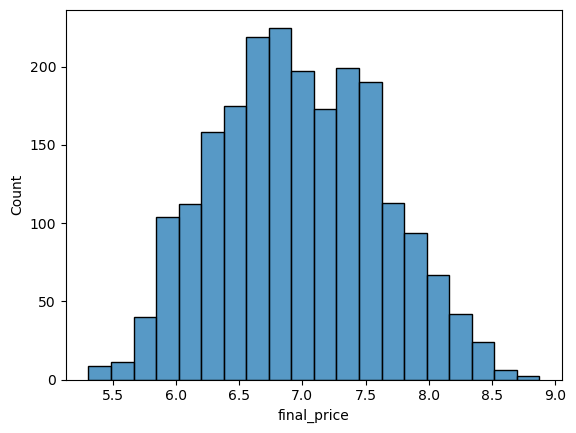

In [271]:
df['final_price'] = np.log1p(df.final_price)
sns.histplot(df.final_price, bins=20)

In [272]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [273]:
df['ram'].describe()

count    2160.000000
mean       15.413889
std         9.867815
min         4.000000
25%         8.000000
50%        16.000000
75%        16.000000
max       128.000000
Name: ram, dtype: float64

Question 3: Building Validation Framework

Answer: 0 with RMSE of 0.64 but they were quite close. 


In [274]:
np.random.seed(45)
n = len(df)

n_train = int(0.6 * n)
n_val = int(0.2 * n)
n_test = n - n_train - n_val

# print(n, n_val, n_test, n_train)
# print(n, n_train + n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [275]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [276]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values


del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [277]:
mean_value = df_train['screen'].mean()

df_train_zeros = df_train['screen'].fillna(0)
df_val_zeros = df_val['screen'].fillna(0)

df_train_mean = df_train['screen'].fillna(mean_value)
df_val_mean = df_val['screen'].fillna(mean_value)

In [278]:
X_train_zeros = df_train_zeros.values.reshape(-1, 1)
X_val_zeros = df_val_zeros.values.reshape(-1, 1)

X_train_mean = df_train_mean.values.reshape(-1, 1)
X_val_mean = df_val_mean.values.reshape(-1, 1)


In [279]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [280]:
w_0, w = train_linear_regression(X_train_zeros, y_train)
y_pred = w_0 + X_train_zeros.dot(w)

<Axes: ylabel='Count'>

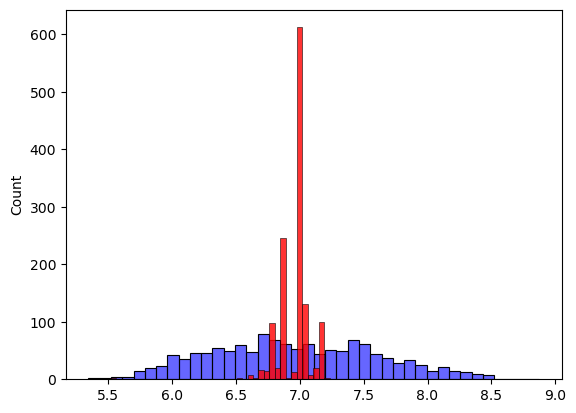

In [281]:
sns.histplot(y_train, label='target', color='blue', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.8, bins=40)

In [282]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [283]:
rmse(y_train, y_pred)

0.6412614957901683

RMSE for Dataframe with 0 to fill NAN
""" 0.640 """

In [284]:
y_pred = w_0 + X_val_zeros.dot(w)
rmse(y_val, y_pred)

0.6403262218939083

In [285]:
w_0, w = train_linear_regression(X_train_mean, y_train)
y_pred_mean = w_0 + X_train_mean.dot(w)


In [286]:
y_pred_mean_val = w_0 + X_val_mean.dot(w)
rmse(y_val, y_pred_mean_val)

0.6341827086328266

<Axes: ylabel='Count'>

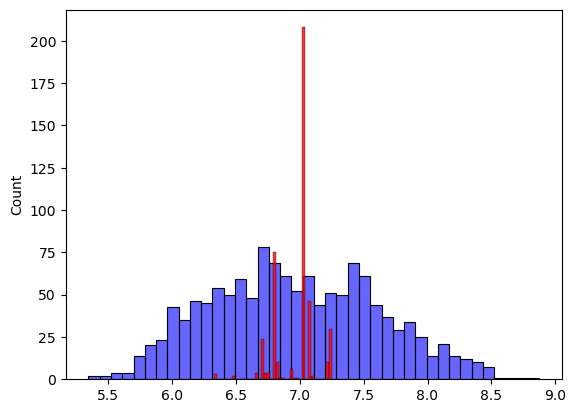

In [287]:
sns.histplot(y_train, label='target', color='blue', alpha=0.6, bins=40)
sns.histplot(y_pred_mean_val, label='prediction', color='red', alpha=0.8, bins=40)

### Regularization

### Answer: 0.01

In [288]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [289]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w_0, w = train_linear_regression_reg(X_train_zeros, y_train, r=r)
    X_val = X_val_zeros
    y_pred = w_0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred), 2)
    
    print(r, w_0, score)

0 5.520108449313586 0.64
0.01 5.5151169746555615 0.64
0.1 5.470598804418068 0.64
1 5.062177119498717 0.64
5 3.803246051312099 0.67
10 2.9043506201404785 0.7
100 0.5733988651237326 0.8


In [290]:
from sklearn.model_selection import train_test_split

def evaluate_seed_influence(df, X, y):
    # seeds = list(range(10))  # [0, 1, 2, ..., 9]
    rmse_scores = []

    for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
        # Train/Validation/Test split (60%/20%/20%)
        df_train, df_temp = train_test_split(df, test_size=0.4, random_state=seed)
        df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=seed)

        # Fill missing values with 0
        df_train.fillna(0, inplace=True)
        df_val.fillna(0, inplace=True)


        # Prepare training data
        X_train = df_train[X].values
        y_train = df_train[y].values

        # Prepare validation data
        X_val = df_val[X].values
        y_val = df_val[y].values

        # Train a linear regression model (without regularization)
        w_0, w = train_linear_regression(X_train, y_train)
        y_pred = w_0 + X_train.dot(w)

        # Make predictions
        y_pred = w_0 + X_val.dot(w)

        # Compute RMSE
        result = rmse(y_val, y_pred)
        rmse_scores.append(result)

    # Compute the standard deviation of RMSE scores
    std_rmse = np.std(rmse_scores)
    
    return round(std_rmse,3)


result = evaluate_seed_influence(df, X=['ram', 'storage', 'screen'], y="final_price")
print("Standard deviation of RMSE:", result)


Standard deviation of RMSE: 0.014


In [291]:
df.columns

Index(['ram', 'storage', 'screen', 'final_price'], dtype='object')

In [292]:
np.random.seed(9)
n = len(df)

n_train = int(0.6 * n)
n_val = int(0.2 * n)
n_test = n - n_train - n_val

# print(n, n_val, n_test, n_train)
# print(n, n_train + n_val + n_test)


df_train = df.iloc[:n_train].reset_index(drop=True)
df_val = df.iloc[n_train:n_train+n_val].reset_index(drop=True)
df_test = df.iloc[n_train+n_val:].reset_index(drop=True)

df_combined = pd.concat([df_train, df_val])


y_train = df_combined.final_price.values.reshape(-1, 1)
y_test = df_test.final_price.values.reshape(-1, 1)


del df_train['final_price']
del df_test['final_price']
del df_combined['final_price']


In [293]:

df_combined.fillna(0, inplace=True)
df_combined.isnull().sum()

ram        0
storage    0
screen     0
dtype: int64

In [294]:
X_train = df_combined.values

X_test = df_test.values
print(X_train.shape, y_train.shape)

(1728, 3) (1728, 1)


In [295]:
w_0, w= train_linear_regression_reg(X_train, y_train, r=0.001)
y_pred = w_0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print(score)


0.44145426563546813
